In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [52]:
df = pd.read_csv(r'data\NASDAQ 50 YEAR DAILY.csv', index_col = 0)
df["log_price"] = np.log2(df[["Adj Close"]])
df.head()



,Open,High,Low,Close,Adj Close,Volume,log_price
Date,,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,6.643856
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,6.655924
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,6.654779
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,6.653777
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,6.664625


In [54]:
data = df[['log_price']]
half = int(len(data)/2)
train_data = data[:half]
test = data[half:]

In [69]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=8, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-38521.413, Time=1.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-39038.018, Time=1.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-39025.229, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-38509.184, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-39039.948, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-39043.371, Time=4.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-39069.841, Time=2.20 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-39070.465, Time=1.48 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-39068.583, Time=5.39 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-39067.699, Time=1.70 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-39069.492, Time=9.16 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-39066.052, Time=10.98 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-39065.854, Time=0.71 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0] intercept
Total fit time: 42.742 se

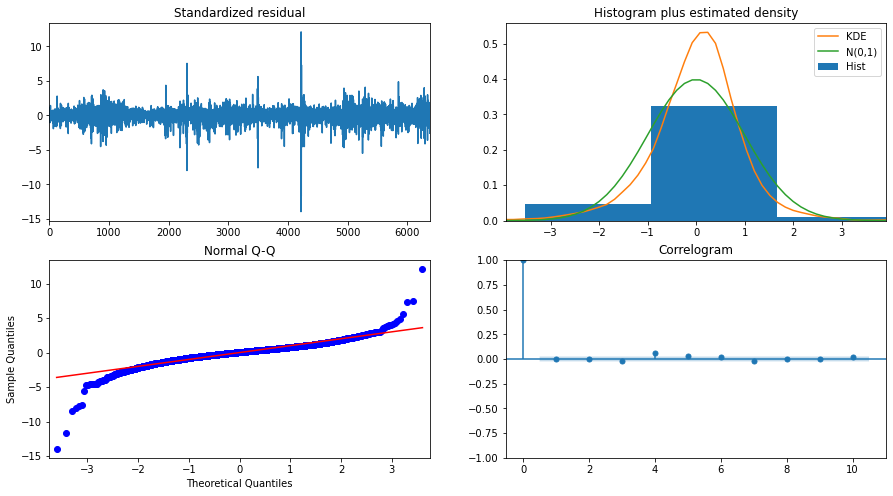

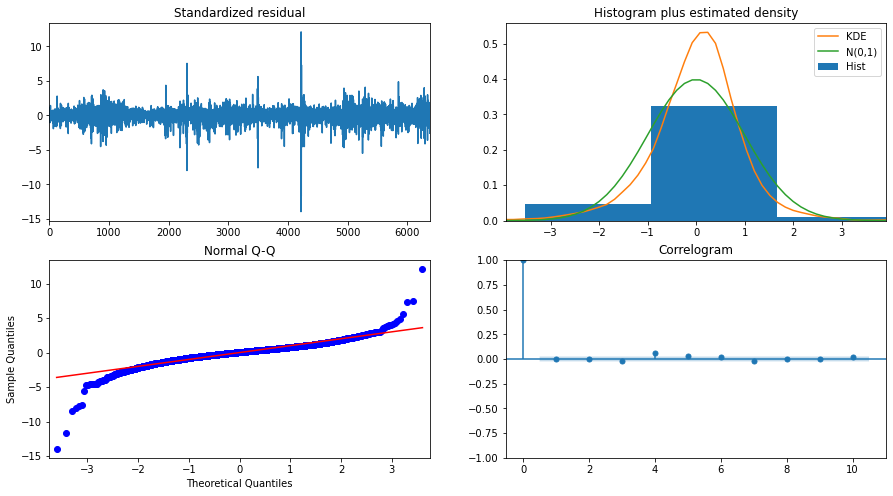

In [58]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))

In [70]:
model = ARIMA(train_data, order=(5, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_price   No. Observations:                 6378
Model:                 ARIMA(5, 1, 0)   Log Likelihood               19542.233
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 07 Oct 2021   AIC                         -39070.466
Time:                        15:15:15   BIC                         -39023.142
Sample:                             1   HQIC                        -39054.082
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0006      0.000      2.581      0.010       0.000       0.001
ar.L1.D.log_price     0.2839      0.013     22.669      0.000       0.259       0.308
ar.L2.D.log_price    -0.

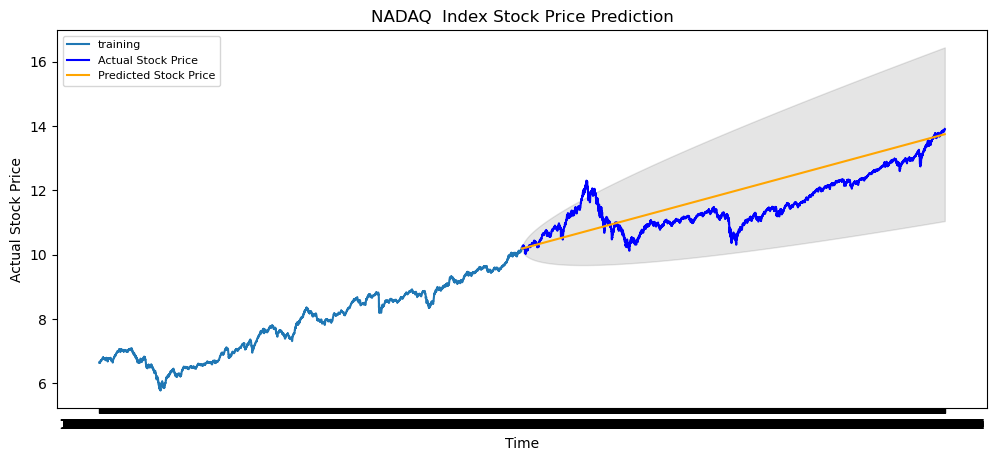

In [71]:
fc, se, conf = fitted.forecast(6379, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('NASDAQ  Index Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.210184
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.212265
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.207832
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.208759
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.214100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.232133
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.254875
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.269699
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.151359
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.152627
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.137183
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.146581
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.148082
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.146760
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.143268
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.135286
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.311022
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.301268
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.292977
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.302205
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.304853
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.297008
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.315557
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.322345
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.393476
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.396273
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.388609
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.358278
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.354249
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.356650
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.363445
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.376223
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.456139
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.435577
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.430108
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.440921
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.456190
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.463565
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.452952
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.459278
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.684179
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.693679
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.678820
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.679357
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.687664
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.675004
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.704422
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.702580
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.585507
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.585488
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.600842
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.595602
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.572880
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.574348
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.581257
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.560247
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.823717
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.833293
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.836477
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.832589
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.828692
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.842099
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.851484
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.855616
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.902722
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.887221
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.898957
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.897929
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.918409
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.921707
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.924100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.940703
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.514329
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.470781
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.543506
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.594399
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.559807
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.589623
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.653750
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.662624
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.152805
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.197340
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.233721
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.238100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.195200
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.191602
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.210251
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.248764
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.372892
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.345633
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.316491
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.304032
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.312236
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.308100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.279100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.307457
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.357348
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.337616
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.310613
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.325210
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.315133
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.298624
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.281994
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.324732
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.599118
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.618372
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.609659
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.623863
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.642634
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.653360
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.652639
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.686290
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.109357
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.110082
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.112325
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.151308
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.107132
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.097413
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.151755
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.172943
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.716052
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.627785
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.675344
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.646266
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.646158
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.756339
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.731705
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.806751
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.995121
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.002748
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.038353
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.047918
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.016523
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.970588
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.000828
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.957976
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.496754
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.449407
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.426611
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.510482
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.557990
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.517556
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.462896
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.413898
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.922369
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.884865
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.930131
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.859100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.837809
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.890036
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.913398
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.905756
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.007560
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.990700
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.002020
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.011661
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.018715
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.053559
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.077176
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.069262
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.626448
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.641429
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.648627
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.649211
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.616723
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.667342
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.732566
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.734202
(array([10.19520865]), array([0.

predicted=10.195209, expected=10.999465
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.981895
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.959089
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.966441
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.925139
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.955519
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.914639
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.878457
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10

predicted=10.195209, expected=10.811238
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.780277
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.756798
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.742596
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.742899
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.700344
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.694297
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.721296
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10

predicted=10.195209, expected=10.382894
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.392521
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.375322
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.321928
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.285310
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.236026
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.298693
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.322942
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.452416
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.470649
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.427009
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.408627
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.365437
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.398273
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.410801
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.463034
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.319040
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.355538
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.395041
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.381889
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.378544
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.397696
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.368921
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.376104
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.557990
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.560419
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.604266
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.610324
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.621090
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.640164
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.635491
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.647063
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.813925
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.822133
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.846650
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.855569
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.868028
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.859721
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.883117
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.871466
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.920219
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.928407
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.898087
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.895310
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.923565
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.928518
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.905583
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.910111
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.948922
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.938433
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.922190
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.899281
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.893150
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.898964
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.941906
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.936653
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.976972
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.984041
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.980011
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.990763
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.999852
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.976958
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.970581
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.939160
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.889382
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.923476
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.931033
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.933322
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.944734
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.928163
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.906868
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.913458
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.029287
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.028327
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.034139
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.022104
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.031033
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.015805
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.027844
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.040317
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.897959
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.901561
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.916148
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.902194
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.938411
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.916021
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.929835
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.912470
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.089940
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.081310
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.087456
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.094223
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.102264
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.093305
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.100255
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.115141
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.011094
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.029204
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.050053
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.045794
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.066298
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.076963
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.083100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.088947
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.141341
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.132474
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.146556
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.139468
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.143307
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.129161
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.143492
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.152557
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.128330
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.122265
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.100531
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.090324
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.099269
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.085380
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.075987
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.082927
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.068610
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.070134
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.059791
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.061446
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.063591
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.077283
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.085008
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.093899
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.232373
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.236379
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.248064
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.247791
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.236738
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.257618
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.259967
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.256126
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.221424
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.221315
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.230195
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.198795
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.211730
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.215958
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.212290
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.225454
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.343968
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.359041
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.358981
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.359069
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.344274
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.353676
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.338157
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.331522
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.383283
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.381516
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.389873
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.398225
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.403859
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.399545
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.420481
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.423699
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.373017
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.349629
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.345782
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.290393
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.287401
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.252967
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.272951
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.281072
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.181227
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.199488
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.161283
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.152171
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.158635
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.198513
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.193421
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.230603
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.175113
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.156576
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.154521
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.169900
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.183561
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.154888
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.174008
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.144798
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.657988
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.647378
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.599941
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.556410
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.687787
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.694541
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.730063
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.748989
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.545380
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.566340
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.565150
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.594549
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.636362
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.636226
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.574338
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.579787
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.744767
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.700604
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.722133
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.714366
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.758523
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.760337
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.754754
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.727282
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.933632
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.943423
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.957987
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.980782
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.978696
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.983157
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.983300
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=10.985650
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.082934
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.087496
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.062343
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.066493
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.087337
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.093437
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.085565
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.099578
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.183853
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.187482
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.192712
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.203929
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.209734
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.209246
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.205921
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.215539
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.131600
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.131831
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.171102
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.171133
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.171902
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.173552
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.160559
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.143256
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.177177
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.202020
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.198046
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.188929
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.184305
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.217485
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.210531
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.216497
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.381148
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.378772
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.380964
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.378826
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.373338
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.394205
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.388690
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.399919
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.446665
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.451118
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.449221
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.441087
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.436457
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.422480
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.431247
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.430568
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.449623
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.431847
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.445946
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.433121
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.464811
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.458525
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.468843
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.481209
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.375816
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.346536
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.343530
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.364933
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.398444
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.365458
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.372141
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.419239
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.459713
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.457350
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.458325
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.475870
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.481638
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.504650
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.502827
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.503866
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.530289
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.524674
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.519002
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.518476
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.518565
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.503120
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.498730
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.488864
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.561536
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.558889
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.565545
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.580442
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.587117
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.586938
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.582735
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.585747
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.510111
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.514985
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.534716
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.539537
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.535173
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.546788
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.556520
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.555663
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.630149
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.635732
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.654694
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.653906
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.658252
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.663723
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.667498
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.662811
(array([10.19520865]), array([0.

predicted=10.195209, expected=11.760396
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.762287
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.746913
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.731501
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.750439
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.741282
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.753271
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.765775
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11

predicted=10.195209, expected=11.861932
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.860253
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.871020
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.885559
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.887746
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.882158
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.878545
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.879679
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.003075
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.018513
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.020779
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.024856
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.021185
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.020355
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.028110
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.016484
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.059358
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.062201
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.049079
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.011133
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.994265
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.005972
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.030633
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=11.985170
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.109514
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.102041
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.108358
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.116480
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.108652
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.111778
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.091254
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.113791
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.045476
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.041426
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.042135
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.056109
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.075502
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.109661
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.097654
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.120494
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.213833
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.216103
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.220306
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.192755
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.179284
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.193344
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.178428
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.191272
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.270710
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.289267
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.292589
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.270100
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.264337
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.271912
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.288736
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.285856
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.303906
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.300221
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.316791
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.298289
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.300464
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.297363
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.301565
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.313932
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.306922
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.289177
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.266751
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.283268
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.283673
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.309249
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.308805
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.317673
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.158171
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.136857
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.149306
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.161825
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.164426
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.154169
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.195249
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.199494
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.268396
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.272644
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.273868
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.279425
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.271031
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.278656
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.276633
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.280376
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.358074
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.365204
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.367396
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.360704
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.323592
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.347591
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.331827
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.337000
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.410584
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.402090
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.415697
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.408508
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.413853
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.408638
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.414009
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.420997
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.500302
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.507210
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.506231
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.508968
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.511844
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.520408
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.525900
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.530001
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.585578
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.606037
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.585045
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.584122
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.576971
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.586572
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.572099
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.587093
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.673245
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.673890
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.685047
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.686102
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.683813
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.685461
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.689026
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.686393
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.804448
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.816140
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.825964
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.818520
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.833341
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.832900
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.840853
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.854874
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.821387
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.802946
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.799403
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.774653
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.773910
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.797394
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.797621
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.786733
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.938878
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.917637
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.897467
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.905348
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.912008
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.929756
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.931478
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.940255
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.834846
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.859935
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.844900
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.839371
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.848615
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.886221
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.878603
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.854654
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.835241
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.856157
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.857277
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.858554
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.867358
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.870128
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.870571
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.864904
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.911089
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.926615
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.920137
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.897142
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.898792
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.893178
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.881747
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.885643
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.939164
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.934235
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.939741
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.960978
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.959075
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.942910
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.961609
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.986701
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.064741
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.056746
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.064519
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.065197
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.079573
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.073778
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.072833
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.079160
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.957111
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.814142
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.943042
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.753340
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.840538
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.771044
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.803845
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=12.748092
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.274747
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.279473
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.279918
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.295838
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.306542
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.274548
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.290163
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.252254
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.376260
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.381579
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.413834
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.440549
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.436354
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.447020
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.467416
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.435022
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.651724
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.653772
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.632365
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.645992
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.637167
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.673693
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.688467
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.670261
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.762817
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.757598
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.772737
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.758415
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.777128
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.778523
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.764329
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.750945
(array([10.19520865]), array([0.

(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.816508
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.801201
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.823654
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.836834
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.842016
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.856911
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.857272
(array([10.19520865]), array([0.01132759]), array([[10.17300698, 10.21741032]]))
predicted=10.195209, expected=13.839655
(array([10.19520865]), array([0.

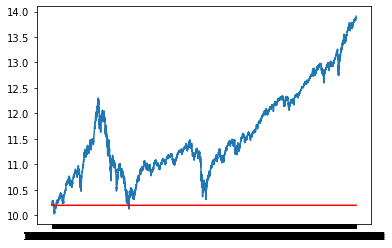

In [72]:
predicted1, resid_test = [], []
history = train_data
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    print(output)
    resid_test.append(test.iloc[t] - output[0])
    predicted1.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid = []
for i in resid_test:
    test_resid.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predicted1, color='red')
plt.show()

<AxesSubplot:xlabel='Date'>

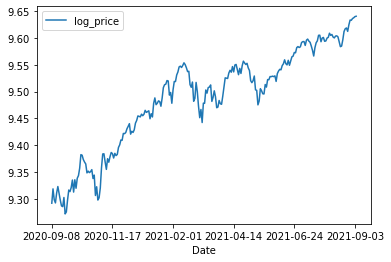

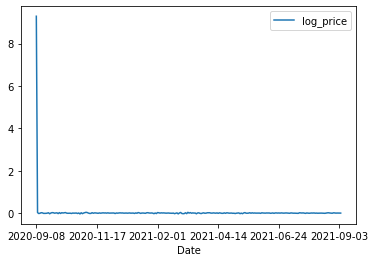

In [27]:
df_diff1 = data.diff().fillna(data)
data.plot()
df_diff2 = df_diff1.fillna(df_diff1)
df_diff2.plot()

In [5]:
from pmdarima.arima import auto_arima

In [47]:
model_auto = auto_arima(train_data)

In [48]:
model_auto

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [30]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  79.030
Date:                Thu, 07 Oct 2021   AIC                           -156.060
Time:                        14:26:20   BIC                           -154.693
Sample:                             0   HQIC                          -155.632
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   9.81e-05      2.564      0.010    5.93e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.32   Prob(JB):                         0.49
Heteroskedasticity (H):               0.77   Skew:                            -0.13
Prob(H) (two-sided):                  0.69   Kurtosis:                         1.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(0, 1, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [56]:
result = model_autoARIMA

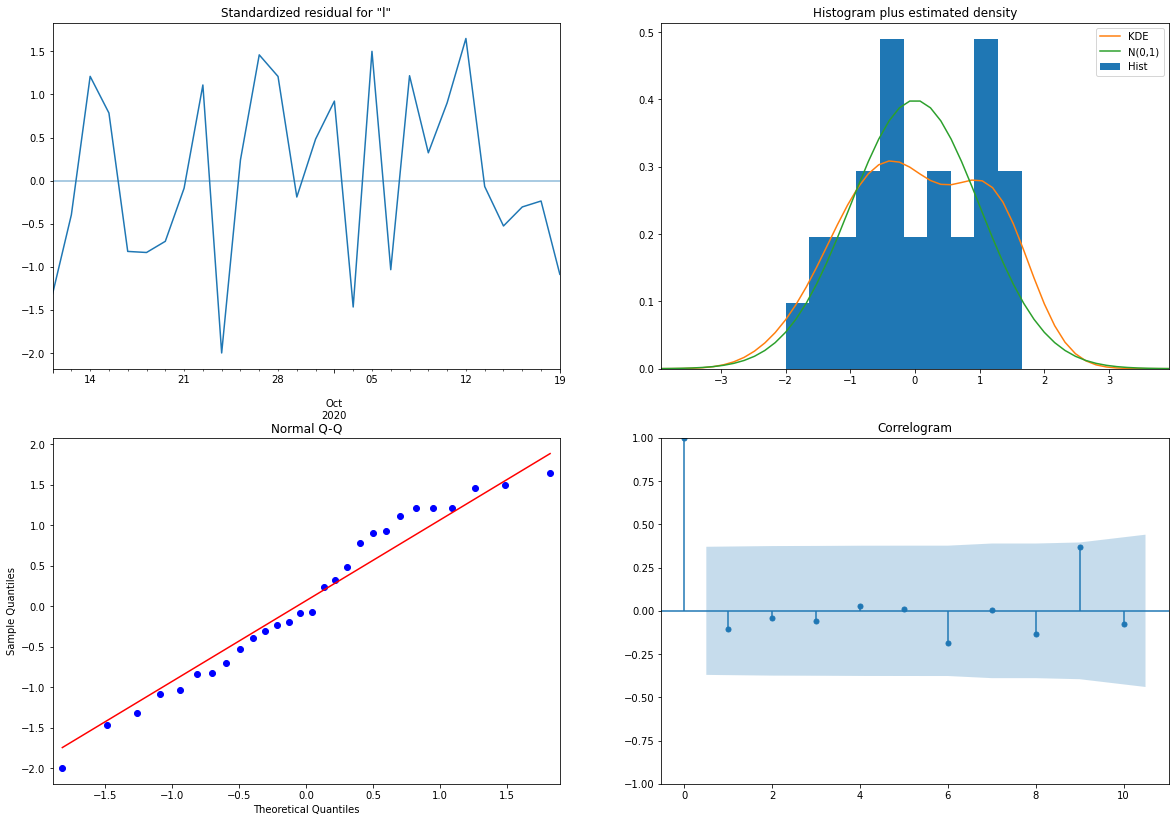

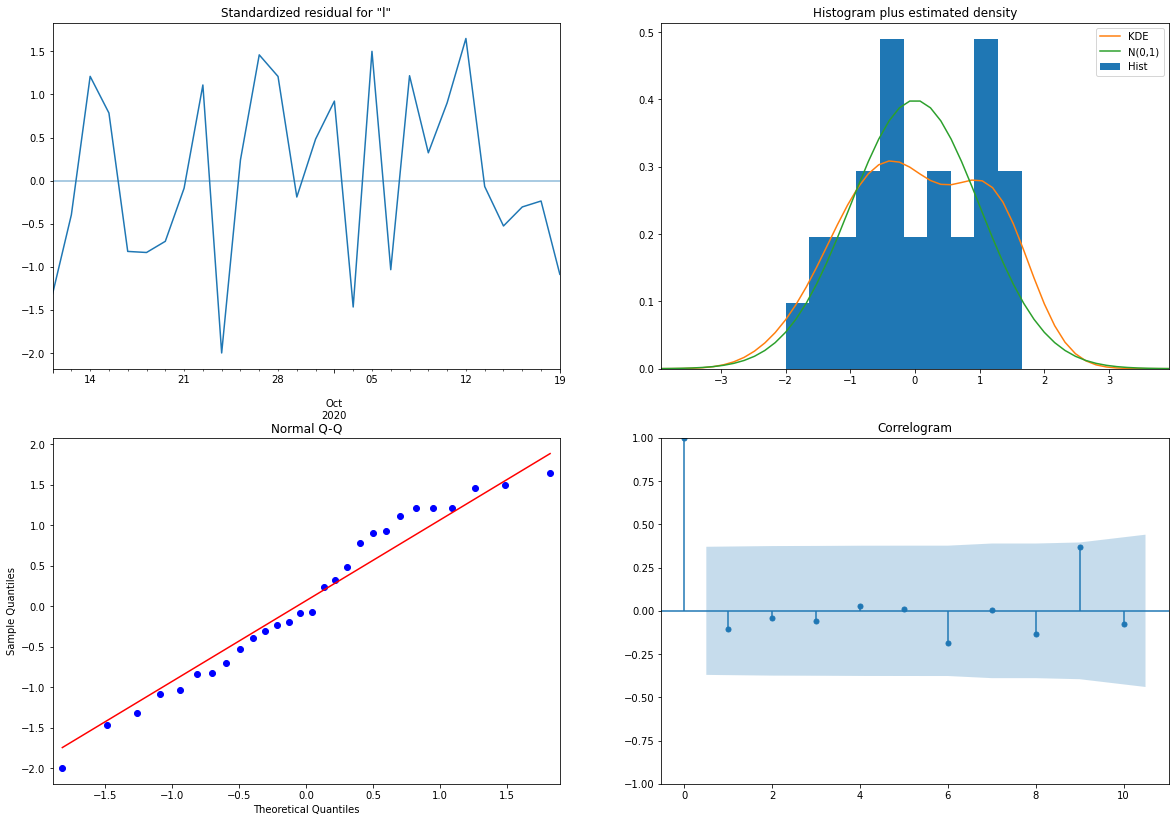

In [57]:
results.plot_diagnostics(figsize=(20, 14))

In [33]:
train_data.tail()

,log_price
Date,
2020-10-13,9.381255
2020-10-14,9.373201
2020-10-15,9.368529
2020-10-16,9.364910
2020-10-19,9.348264


In [34]:
data.tail()

,log_price
Date,
2021-08-31,9.632941
2021-09-01,9.636221
2021-09-02,9.637644
2021-09-03,9.639751
2021-09-07,9.640454


In [13]:
train_data.isnull().values.any()

False

In [14]:
pred0 = results.get_prediction(start='2020-09-11', dynamic=False)
pred0_ci = pred0.conf_int()
pred1 = results.get_prediction(start='2020-09-11', dynamic=True)
pred1_ci = pred1.conf_int()


In [15]:
forecast = results.forecast()

In [16]:
forecast

2020-10-20    11478.879883
Freq: B, dtype: float64

In [17]:
pred2 = forecast + data["Adj Close"].mean()
# pred2_ci = pred2.conf_int()

In [18]:
pred2

2020-10-20    24707.892245
Freq: B, dtype: float64

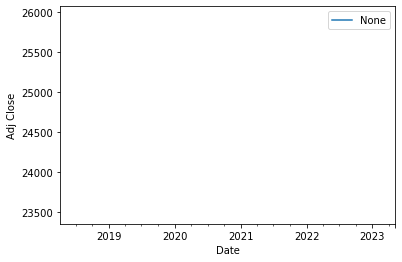

In [19]:

ax = pred2.plot()
#ax = data[:30].plot(figsize=(20, 20))
#pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
#pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
#pred2.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
#ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.legend()
plt.show()

In [20]:
test.iloc[0]

Adj Close    11516.490234
Name: 2020-10-20, dtype: float64

(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.436354
(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.447020
(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.467416
(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.435022
(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.468177
(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.445351
(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.472259
(array([13.4896788]), array([0.02310185]), array([[13.4444   , 13.5349576]]))
predicted=13.489679, expected=13.479399
(array([13.4896788]), array([0.02310185]), array([[13.44

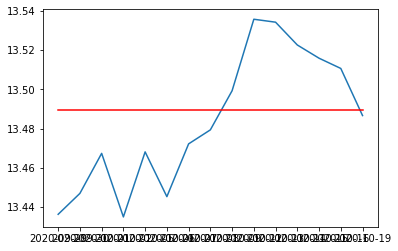

In [46]:
predicted1, resid_test = [], []
history = train_data
for t in range(len(test)):
    model = ARIMA(history, order=(0,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    print(output)
    resid_test.append(test.iloc[t] - output[0])
    predicted1.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid = []
for i in resid_test:
    test_resid.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predicted1, color='red')
plt.show()